# Income Per Capita - ML Prediction
This project aims to predict GDP for 2024 using historical data and a Random Forest model. It involves preparing and cleaning data, training the model, and making predictions. The results are compared with actual 2023 GDP values, and visualizations are created to highlight the top 10 countries by GDP in both years. The predictions are then saved to a CSV file for further analysis.

#### Project Overview

*Objective:* This project involves predicting the Gross Domestic Product (GDP) for the year 2024 using historical GDP data and a Random Forest Regressor model. The analysis compares the predicted GDP values with the actual GDP values for the year 2023 and visualizes the results to identify key trends and discrepancies.

*Outcome:* This project provides insights into how GDP for different countries is expected to change in 2024 compared to 2023. It helps in understanding which countries are projected to experience significant changes in their economic performance and highlights the effectiveness of the predictive model.

#### Dataset

The dataset used in this project is sourced from the [World Bank](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?end=2023&locations=KE-SG&start=1960&view=chart) and contains historical GDP per capita data from 1960 to 2023. This dataset provides annual GDP per capita figures for multiple countries. 

The data is represented in current US dollars, offering a detailed view of economic performance over the decades. It is instrumental for analyzing economic growth trends, making predictions, and comparing economic conditions across different countries.

**Install Dependencies**

In [80]:
pip install geopandas matplotlib shapefile


ERROR: Could not find a version that satisfies the requirement shapefile (from versions: none)
ERROR: No matching distribution found for shapefile
Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import geopandas as gpd

**Data Collection and Processing**

In [82]:
# Increase the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [83]:
# Load your data
df = pd.read_csv('/kaggle/input/gdp-income-per-capita-2/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3152603.csv', skiprows=4)

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6283.001443,7567.253642,9274.514156,10767.396220,11638.733706,12850.215712,13657.670644,14970.152342,16675.278488,17140.433369,17375.225306,18713.425388,19742.316739,19833.826746,21026.167091,20911.192767,21375.269123,22050.589873,24105.524121,24978.221674,25832.925565,27665.299480,29011.639057,25740.770230,24452.588739,26043.156325,25611.175767,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,214.666914,226.978859,237.911431,256.356381,253.382370,268.350079,282.736958,354.498832,421.977185,435.977902,430.261244,468.301007,509.479882,578.56322,728.089032,747.045457,689.942671,711.678241,638.748097,534.636572,560.769812,653.141414,690.218354,712.241039,810.646700,858.727619,732.360418,715.892117,707.177202,773.575369,750.771356,774.549635,704.277316,678.004156,715.142507,633.473382,633.520201,819.986705,994.193854,1130.168938,1235.847125,1379.746756,1439.240924,1404.535948,1622.684093,1757.998404,1724.204053,1696.356040,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.188369,142.903364,182.174038,199.643227,221.830531,254.115276,274.015392,376.318300,382.533807,453.387385,562.499222,608.738850,653.417475,638.733181,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,162.890667,145.568085,146.846475,162.721305,219.865368,197.103880,231.571756,282.642421,370.935049,416.440748,484.122148,494.689121,527.986474,630.01727,763.507778,1336.290032,1172.997045,881.422885,745.326947,762.111295,588.180369,588.670593,567.573163,516.079428,598.393655,612.434519,571.645718,579.709833,586.813721,878.384133,1084.230494,1108.675984,1159.186837,531.516489,527.202562,539.225749,627.095915,706.476561,850.083582,1008.341766,1246.349454,1421.444644,1685.806936,1467.789174,1680.141063,1861.537303,1958.077403,2154.315084,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450.980076,329.224182,398.113614,454.376650,516.128602,423.403711,387.689438,556.884253,527.464111,872.657631,982.805587,1254.696119,1900.723809,2597.963587,3121.348725,4081.717506,3123.698885,3586.663694,4608.155166,5083.826873,5061.349253,5011.984427,3217.339240,1809.709377,2439.374439,2540.508879,2191.347764,1450.905111,1927.474078,2933.484644,2309.521620,NaN


In [84]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            138 non-null    float64
 5   1961            142 non-null    float64
 6   1962            144 non-null    float64
 7   1963            144 non-null    float64
 8   1964            144 non-null    float64
 9   1965            154 non-null    float64
 10  1966            155 non-null    float64
 11  1967            158 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            181 non-null    float64
 15  1971            182 non-null    float64
 16  1972            182 non-null    float64
 17  1973            182 non-null    flo

In [86]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
count,138.000000,142.000000,144.000000,144.000000,144.000000,154.000000,155.000000,158.000000,159.000000,159.000000,181.000000,182.000000,182.000000,182.000000,182.000000,186.000000,186.000000,189.000000,188.000000,189.000000,197.000000,198.000000,200.000000,201.000000,203.000000,205.000000,205.000000,212.000000,216.000000,220.000000,236.000000,236.000000,239.000000,243.000000,244.000000,247.000000,247.000000,247.000000,249.000000,250.000000,251.000000,252.000000,256.000000,256.000000,256.000000,256.000000,257.000000,257.000000,258.000000,258.000000,258.000000,261.000000,259.000000,259.000000,260.000000,258.000000,258.000000,258.000000,258.000000,259.000000,258.000000,257.000000,251.000000,235.000000,0.0
mean,489.296298,505.311820,556.329591,588.836009,638.102606,681.925855,726.136147,745.962815,777.836883,842.118869,1015.759599,1117.176562,1298.342527,1650.699531,2148.695181,2325.545642,2528.922016,2772.033633,3141.961629,3721.797989,4196.991297,4071.229917,3887.922806,3751.032067,3683.070328,3670.752199,4242.011982,4787.544209,5150.706349,5217.982497,5792.618778,5830.165379,6089.033310,5861.337250,6207.007540,6999.500221,7221.526723,7098.214251,7240.547820,7533.099507,7511.516251,7518.112096,8116.030286,9338.791986,10641.145055,11523.928062,12874.862417,14667.242061,15718.225891,14044.390233,14751.755636,16272.435455,16164.642513,16745.402918,17075.296816,15440.461801,15753.070676,16555.219987,17539.915009,17436.250916,16212.193495,18647.640969,18790.942970,16361.132317,NaN
std,617.560149,639.658508,759.913105,784.744250,841.888905,861.756469,930.440803,963.648033,1005.479175,1083.981146,1448.701722,1604.828820,1901.418935,2463.062959,3353.000810,3757.138208,4113.693150,4506.373387,4934.729712,5864.769120,6774.825100,6384.091390,5898.523571,5506.459327,5331.464948,5329.533641,6478.806732,7704.459738,8340.459784,8348.153392,9633.039923,9795.596577,10463.202396,9951.608797,10658.056540,12203.435536,12374.306421,11650.574572,12054.977017,12578.801677,12200.414306,12154.547631,13028.302324,15174.063872,17168.605862,18227.259590,20367.737291,23509.052779,25105.670547,21960.924794,22489.974816,24559.377109,23856.200622,25384.904082,25956.543614,23385.322769,23676.968577,24486.231711,26054.653043,25764.211167,24466.469650,28957.933080,29133.597752,21598.751869,NaN
min,25.095808,27.274630,27.953179,25.807009,17.331833,15.113228,11.792676,16.523528,21.500297,21.450315,20.655084,21.044220,23.193271,24.678411,41.193618,34.968946,38.934916,27.684711,29.062958,29.013206,31.023485,32.571022,42.632562,39.000773,36.063858,40.099438,42.128698,0.002425,0.002886,0.002925,52.748556,22.850371,30.114316,53.480235,62.205969,62.919444,72.324165,107.392967,126.919849,99.757251,122.961660,119.261857,110.460875,114.367007,128.538423,151.188541,166.276245,170.706877,194.710635,204.544756,222.660583,236.451347,238.205945,241.547666,257.818557,289.359627,242.539527,244.145422,232.060617,216.972971,216.827417,221.157803,259.025031,199.580760,NaN
25%,116.253235,121.188289,126.232236,130.834544,138.250698,146.085582,155.359299,156.711090,163.406594,169.626100,205.218241,209.125867,226.592637,273.424689,327.317351,362.901876,388.881384,435.390563,487.564788,540.440341,581.328137,631.422061,613.686900,578.326149,556.753846,534.636572,528.200130,565.721877,568.484996,578.139039,651.481902,635.108452,573.391033,565.801376,586.714324,681.815164,723.596350,730.429352,702.433693,617.955625,638.167742,626.696414,694.190127,773.022506,934.553982,1079.181467,1237.902270,1379.746756,1550.648211,1432.128050,1648.142311,1861.537303,1902.078484,2083.374242,2158.913921,2001.673215,2019.259963,2041.881381,2202.316537,2179.636520,2094.776778,2350.

In [87]:
df.shape

(266, 69)

In [88]:
df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              128
1961              124
1962              122
1963              122
1964              122
1965              112
1966              111
1967              108
1968              107
1969              107
1970               85
1971               84
1972               84
1973               84
1974               84
1975               80
1976               80
1977               77
1978               78
1979               77
1980               69
1981               68
1982               66
1983               65
1984               63
1985               61
1986               61
1987               54
1988               50
1989               46
1990               30
1991               30
1992               27
1993               23
1994               22
1995               19
1996               19
1997               19
1998               17
1999               16
2000               15
2001      

In [89]:
# drop unused columns
df = df.drop(columns=['Unnamed: 68', 'Country Code', 'Indicator Name', 'Indicator Code'])

In [90]:
# Set 'Country Name' as Index
df = df.set_index('Country Name')

In [91]:
# Handle missing values by forward and backward filling within each row
df = df.ffill(axis=1)
df = df.bfill(axis=1)

In [92]:
# Create lag features(Creates lag features for GDP to include past values of GDP as predictors. For instance, GDP_Lag_1 represents the GDP from the previous year.)
#for i in range(1, 6): # Creating lag features for 1 to 5 years
#    df[f'GDP_Lag_{i}'] = df['2023'].shift(i)

**Exploratory Data Analysis(EDA)**

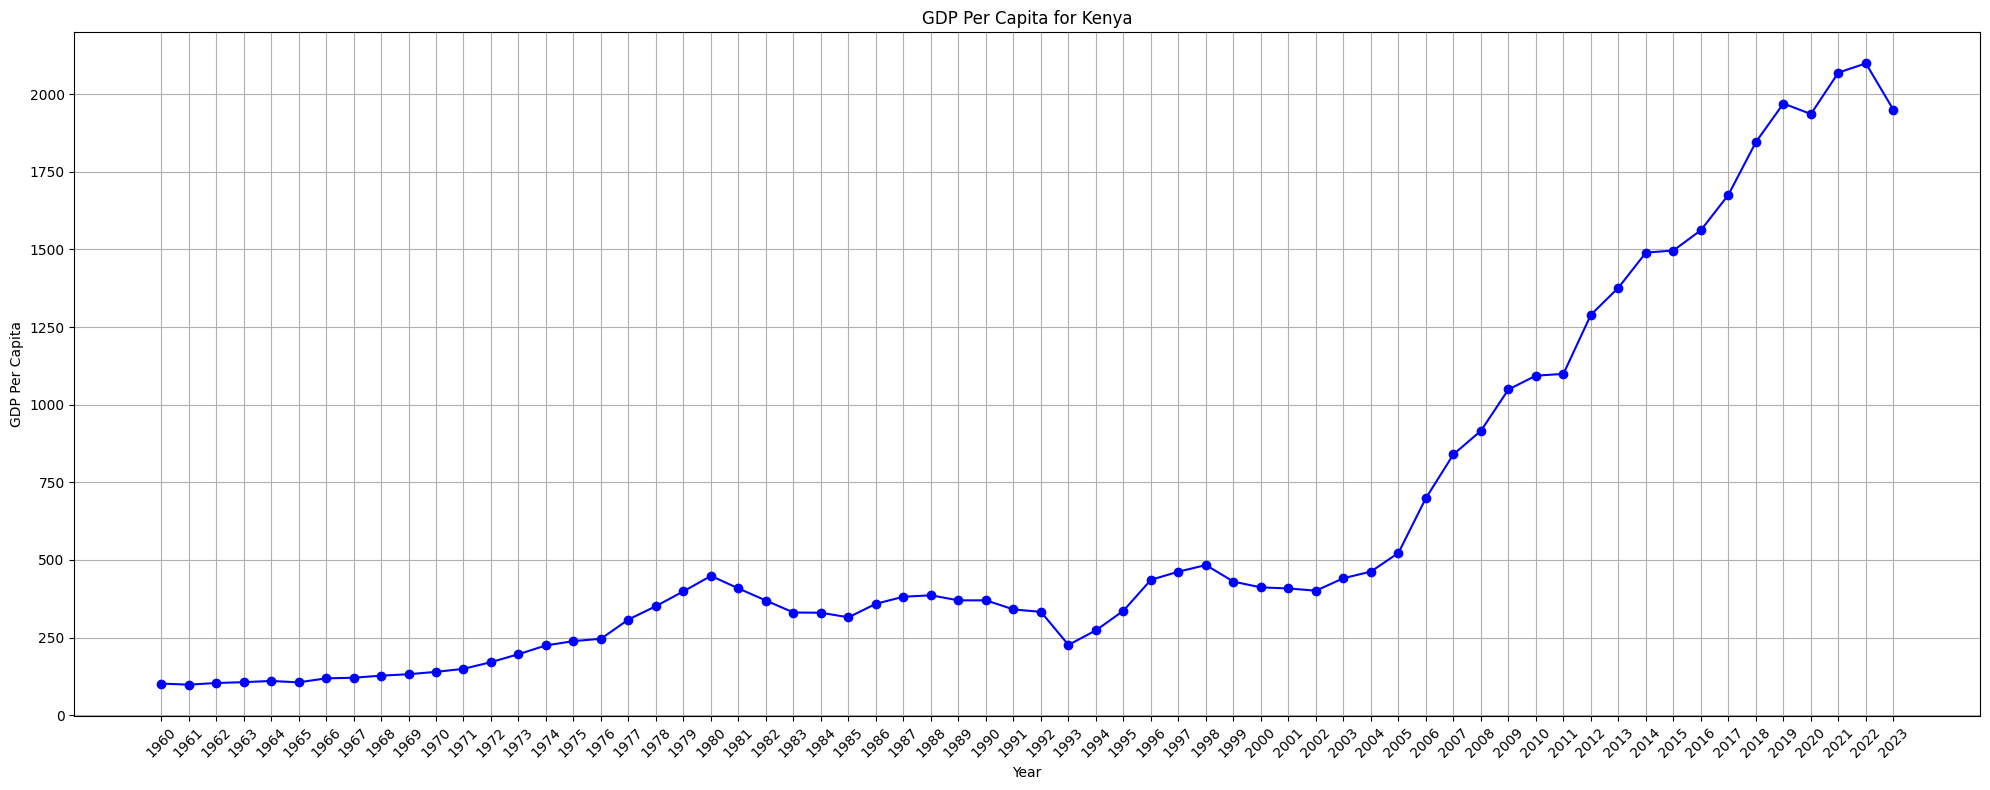

In [93]:
# Plot GDP per capita for Kenya

# Ensure 'Country Name' is the index and use .loc to select Kenya's data
kenya_data = df.loc['Kenya']

# Extract years and GDP per capita values
years = kenya_data.index
gdp_per_capita = kenya_data.values

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(years, gdp_per_capita, marker='o', linestyle='-', color='b')
plt.title('GDP Per Capita for Kenya')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

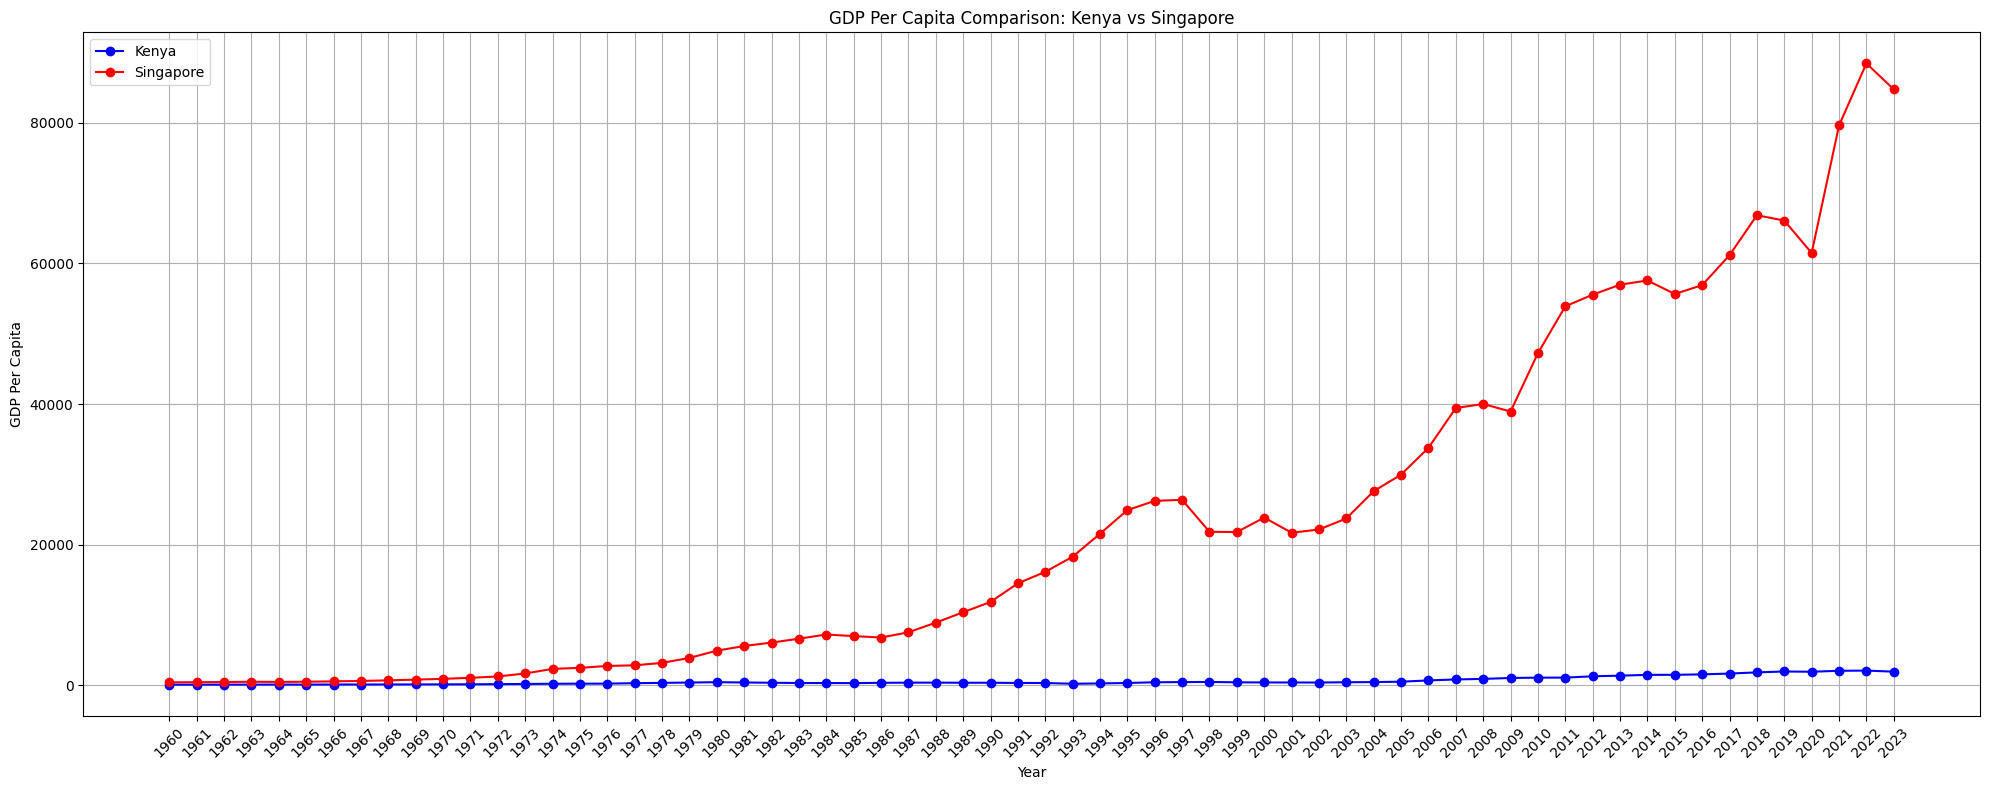

In [94]:
# Filter the data for Kenya and Singapore
kenya_data = df.loc['Kenya']
singapore_data = df.loc['Singapore']

# Extract years and GDP per capita values
years = kenya_data.index
gdp_per_capita_kenya = kenya_data.values
gdp_per_capita_singapore = singapore_data.values

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(years, gdp_per_capita_kenya, marker='o', linestyle='-', color='b', label='Kenya')
plt.plot(years, gdp_per_capita_singapore, marker='o', linestyle='-', color='r', label='Singapore')
plt.title('GDP Per Capita Comparison: Kenya vs Singapore')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- In 1968, Kenya and Singapore had the same GDP per capita, reflecting similar economic conditions at that time. However, since then, Singapore has experienced extraordinary economic growth, leading to a GDP per capita that is now 40 times higher than Kenya's. This dramatic disparity could be attributed to Singapore's successful economic policies, strategic investments in technology and education, robust infrastructure development, and effective governance, which propelled its rapid economic advancement. In contrast, Kenya has faced various challenges, including political instability, slower economic reforms, and infrastructure limitations, which have impacted its economic growth trajectory.

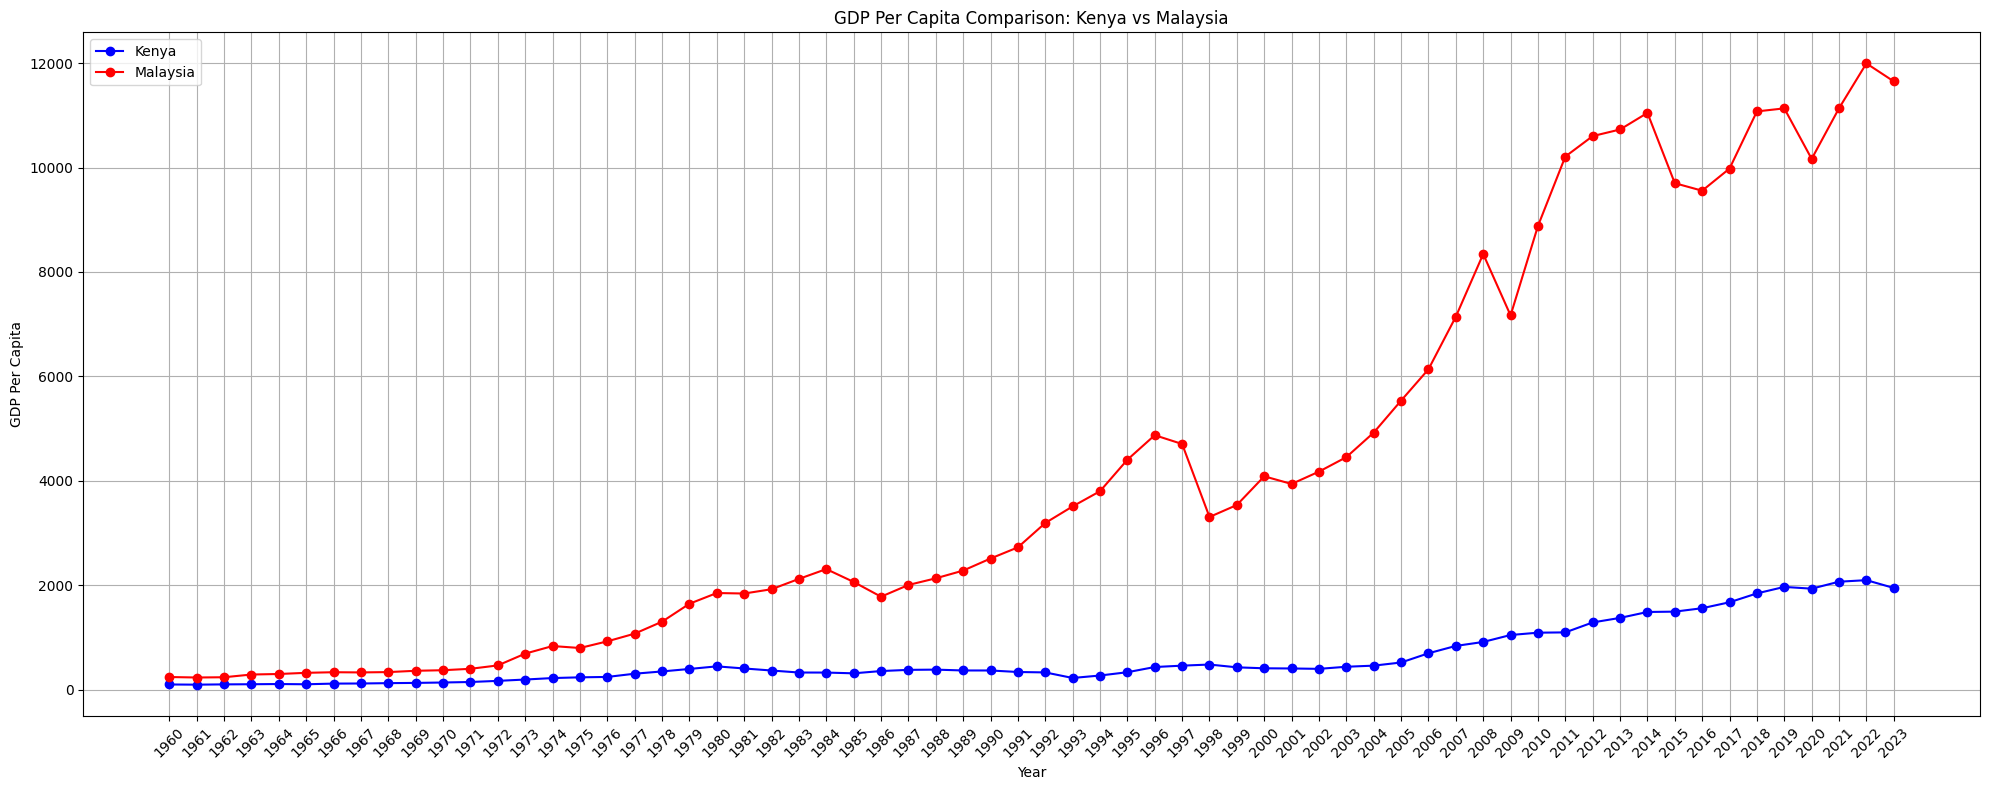

In [95]:
# Filter the data for Kenya and Malaysia
kenya_data = df.loc['Kenya']
malaysia_data = df.loc['Malaysia']

# Extract years and GDP per capita values
years = kenya_data.index
gdp_per_capita_kenya = kenya_data.values
gdp_per_capita_malaysia = malaysia_data.values

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(years, gdp_per_capita_kenya, marker='o', linestyle='-', color='b', label='Kenya')
plt.plot(years, gdp_per_capita_malaysia, marker='o', linestyle='-', color='r', label='Malaysia')
plt.title('GDP Per Capita Comparison: Kenya vs Malaysia')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Up until 1972, Kenya and Malaysia had similar GDP per capita levels. Since then, Malaysia has surged ahead, with its GDP per capita now nearly six times higher than Kenya's. This disparity likely results from Malaysia's strategic economic policies, including industrialization, investment in education, and infrastructure development, which fueled its rapid economic growth. In contrast, Kenya has faced challenges such as political instability and slower economic reforms, which have impacted its growth trajectory.

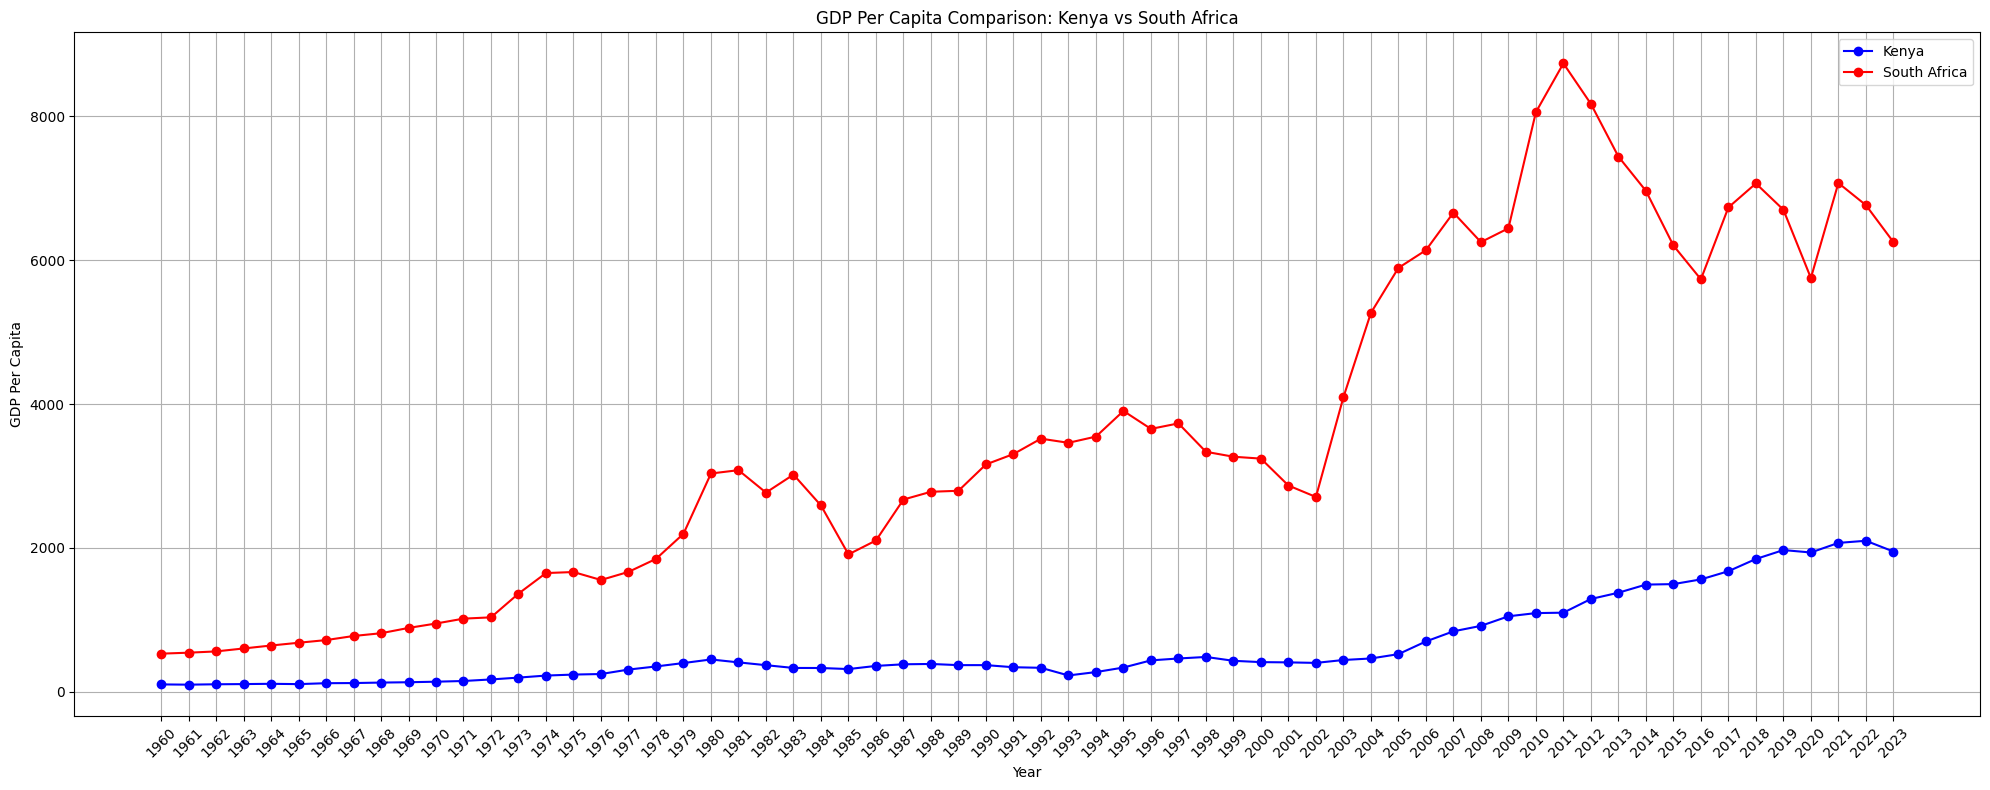

In [96]:
# Filter the data for Kenya and South Africa
kenya_data = df.loc['Kenya']
south_africa_data = df.loc['South Africa']

# Extract years and GDP per capita values
years = kenya_data.index
gdp_per_capita_kenya = kenya_data.values
gdp_per_capita_south_africa = south_africa_data.values

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(years, gdp_per_capita_kenya, marker='o', linestyle='-', color='b', label='Kenya')
plt.plot(years, gdp_per_capita_south_africa, marker='o', linestyle='-', color='r', label='South Africa')
plt.title('GDP Per Capita Comparison: Kenya vs South Africa')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- In 1972, Kenya and South Africa had similar GDP per capita levels. Today, South Africa’s GDP per capita is nearly three times higher than Kenya’s. This disparity is due to South Africa’s effective economic policies, significant infrastructure investments, and economic diversification. In contrast, Kenya has faced challenges such as political instability, slower economic reforms, and reliance on agriculture, impacting its economic growth. Despite being in the same continent, these factors have led to divergent economic trajectories for the two countries.

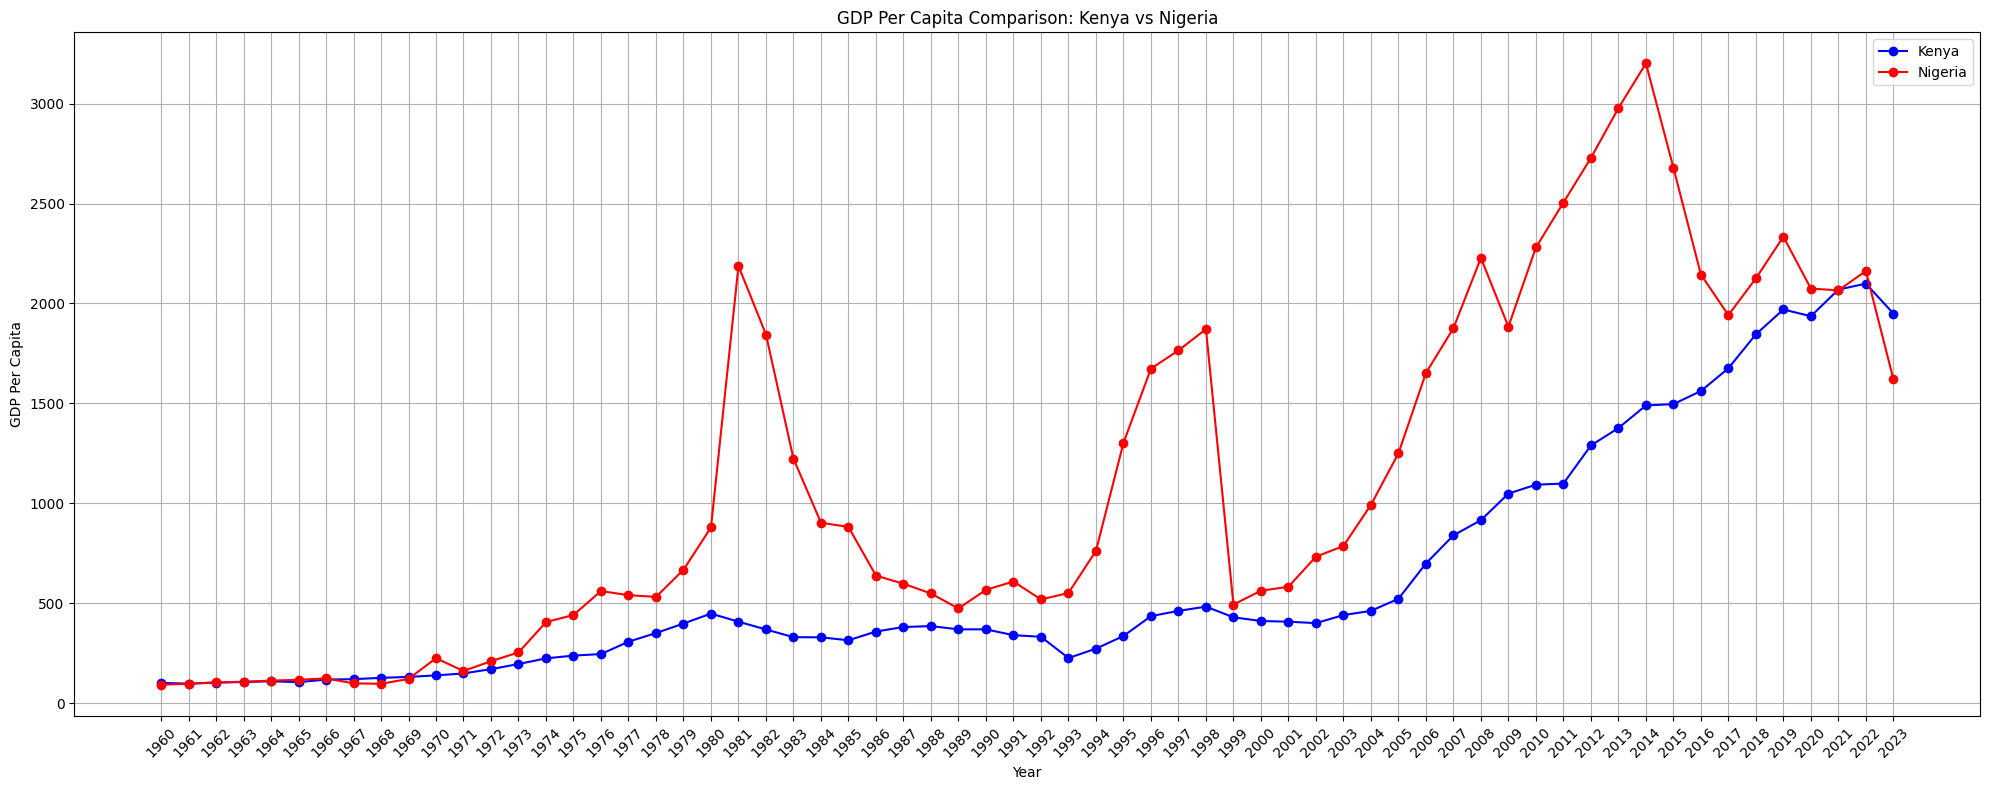

In [97]:
# Filter the data for Kenya and Nigeria
kenya_data = df.loc['Kenya']
nigeria_data = df.loc['Nigeria']

# Extract years and GDP per capita values
years = kenya_data.index
gdp_per_capita_kenya = kenya_data.values
gdp_per_capita_nigeria = nigeria_data.values

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(years, gdp_per_capita_kenya, marker='o', linestyle='-', color='b', label='Kenya')
plt.plot(years, gdp_per_capita_nigeria, marker='o', linestyle='-', color='r', label='Nigeria')
plt.title('GDP Per Capita Comparison: Kenya vs Nigeria')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

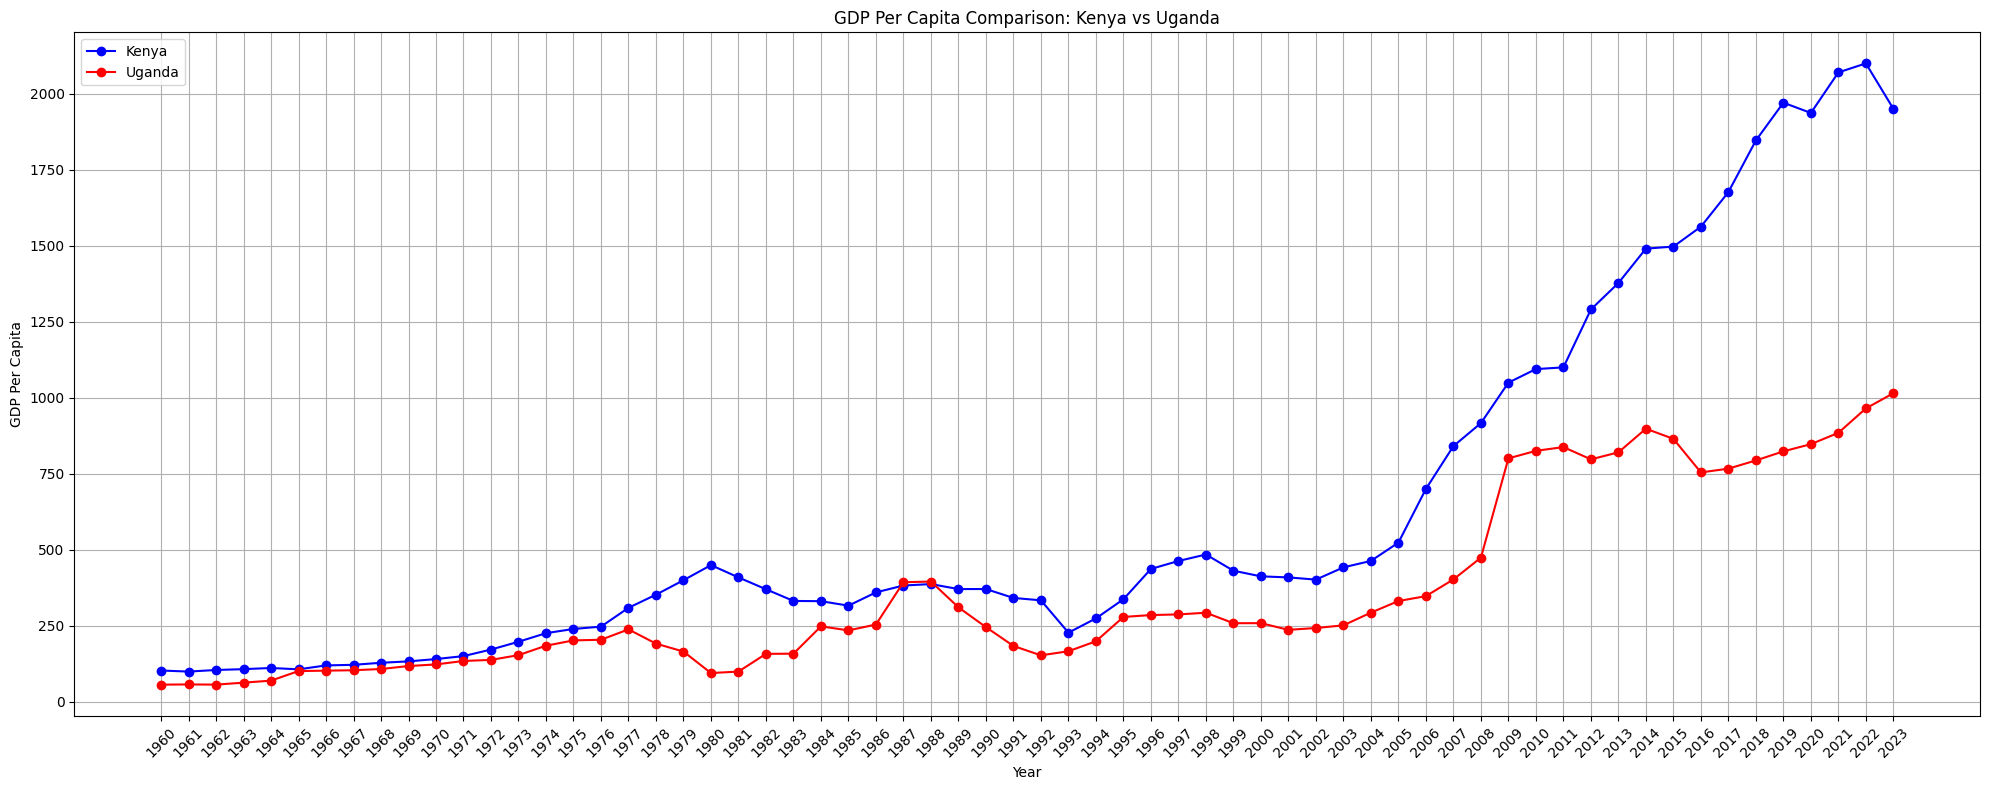

In [98]:
# Filter the data for Kenya and Uganda
kenya_data = df.loc['Kenya']
uganda_data = df.loc['Uganda']

# Extract years and GDP per capita values
years = kenya_data.index
gdp_per_capita_kenya = kenya_data.values
gdp_per_capita_uganda = uganda_data.values

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(years, gdp_per_capita_kenya, marker='o', linestyle='-', color='b', label='Kenya')
plt.plot(years, gdp_per_capita_uganda, marker='o', linestyle='-', color='r', label='Uganda')
plt.title('GDP Per Capita Comparison: Kenya vs Uganda')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

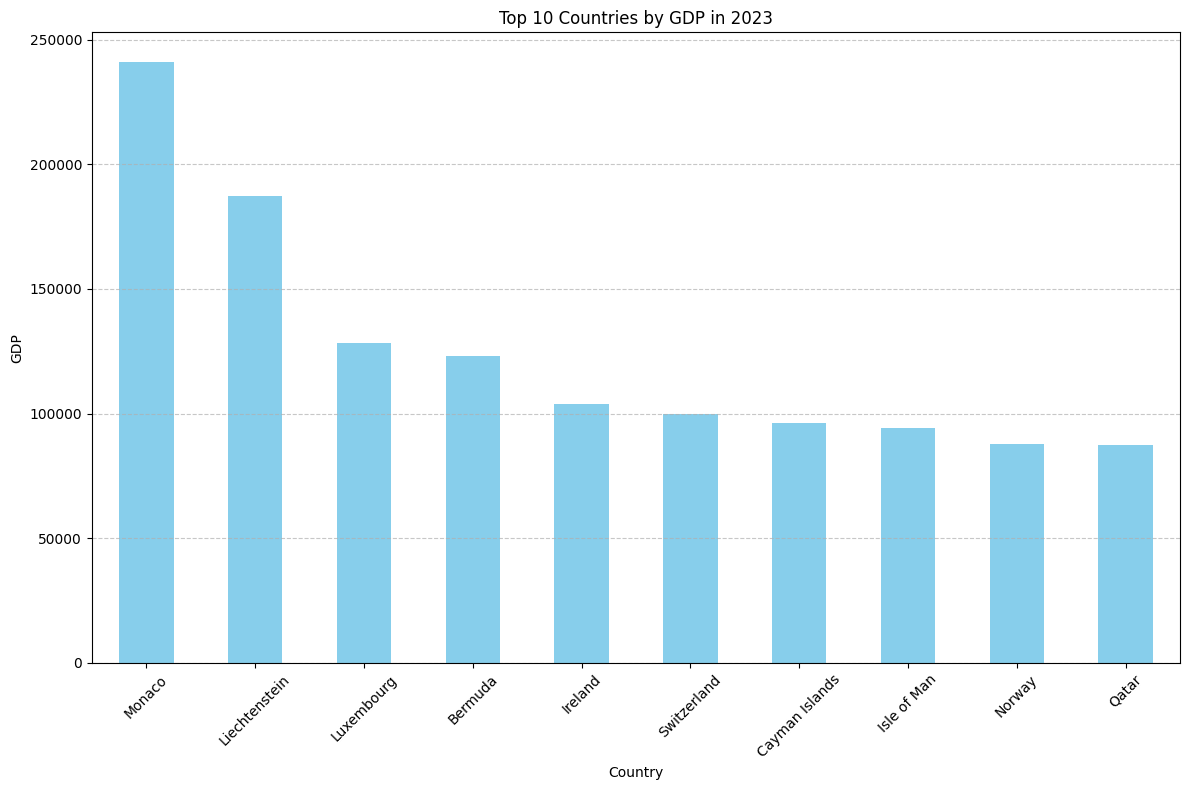

In [99]:
# Ensure 'Country Name' is the index and extract the GDP values for 2023
gdp_2023 = df.loc[:, '2023']

# Find the top N countries with the highest GDP
top_n = 10  # You can adjust this value to get more or fewer countries
top_countries = gdp_2023.nlargest(top_n)

# Plotting
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Countries by GDP in 2023')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

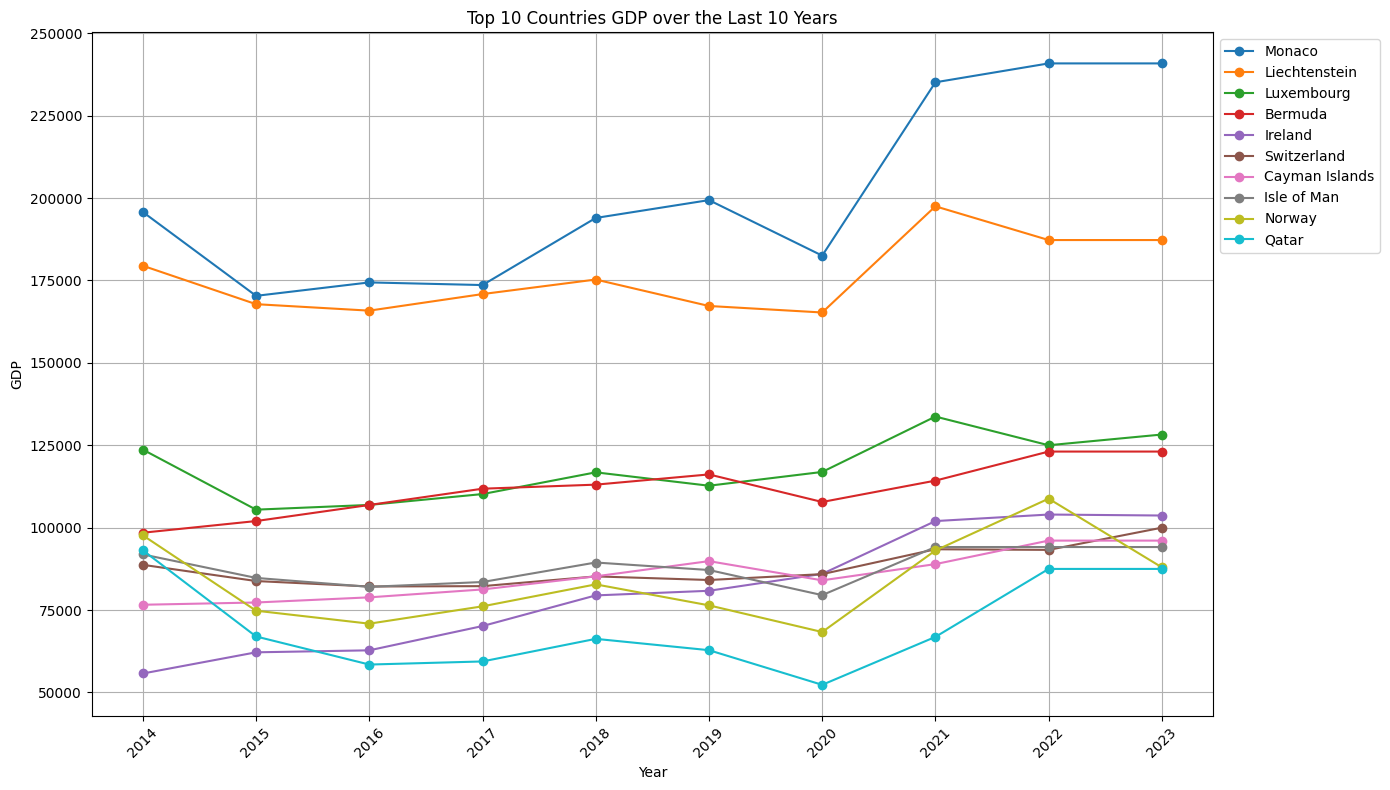

In [100]:
# Extract the last 10 years of data
years = df.columns[-10:]  # Last 10 years
gdp_last_10_years = df[years]

# Find the top 10 countries based on GDP in the most recent year (latest year)
latest_year = years[-1]
top_10_countries = gdp_last_10_years[latest_year].nlargest(10).index

# Filter the GDP data for these top 10 countries over the last 10 years
top_10_gdp_last_10_years = gdp_last_10_years.loc[top_10_countries]

# Plotting
plt.figure(figsize=(14, 8))

for country in top_10_countries:
    plt.plot(years, top_10_gdp_last_10_years.loc[country], marker='o', label=country)

plt.title('Top 10 Countries GDP over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_33/1677176773.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


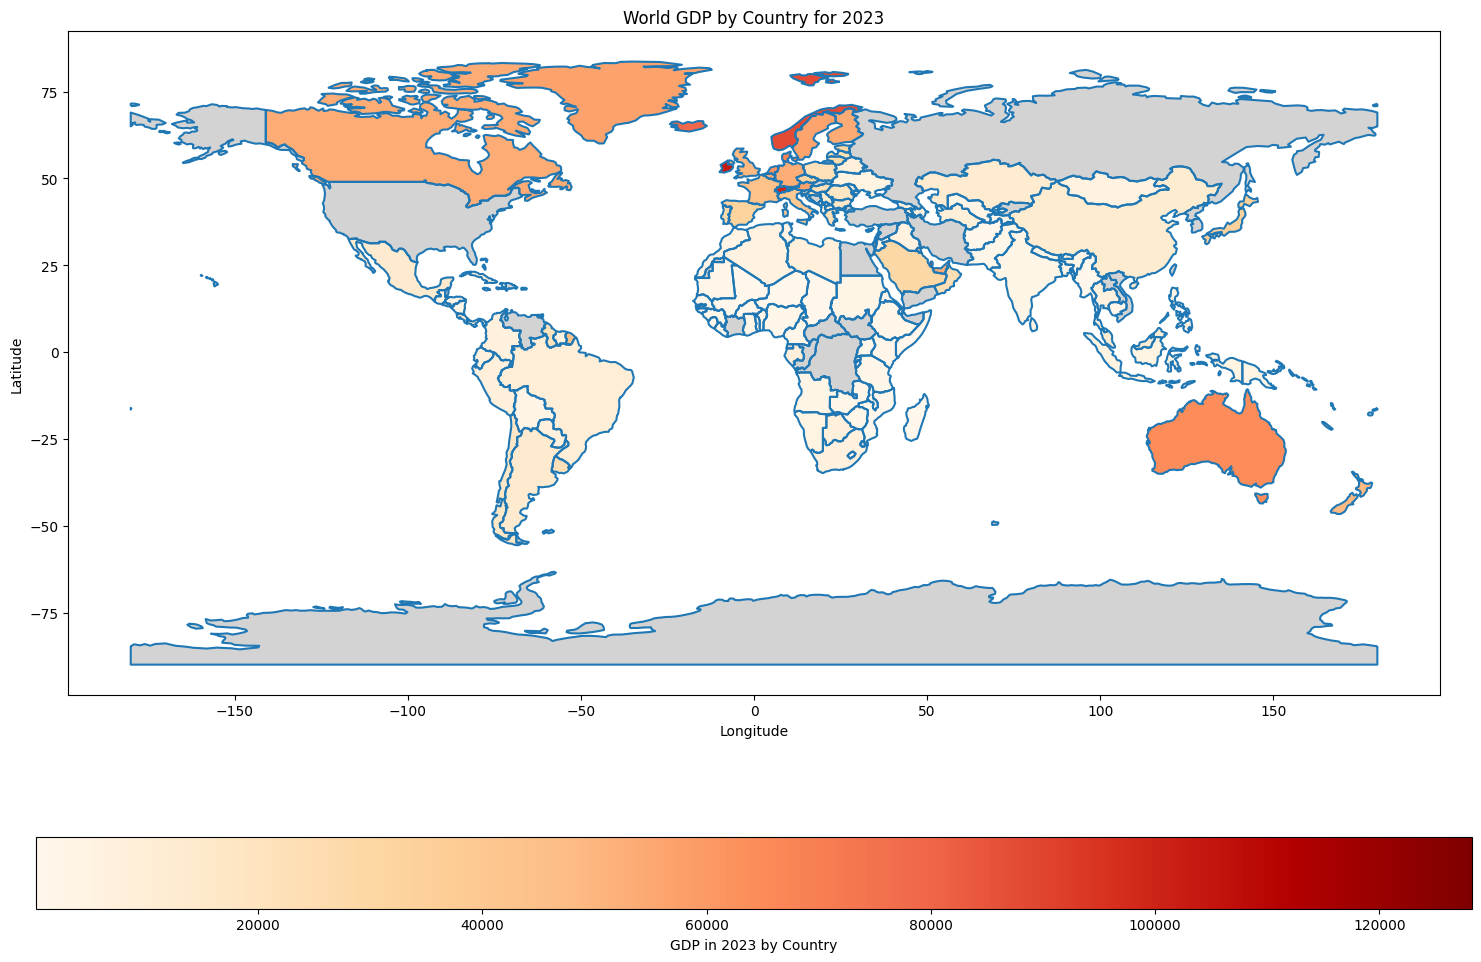

In [ ]:
# Load the shapefile with country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Ensure 'Country Name' is the index or adjust according to your data
# Extract GDP for 2023 and create a dataframe
gdp_2023 = df[['2023']].reset_index()
gdp_2023.columns = ['Country Name', 'GDP 2023']

# Merge the GDP data with the world geometries
world = world.merge(gdp_2023, how='left', left_on='name', right_on='Country Name')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='GDP 2023', ax=ax, legend=True,
           legend_kwds={'label': "GDP in 2023 by Country",
                        'orientation': "horizontal"},
           cmap='OrRd', missing_kwds={"color": "lightgrey"})

plt.title('World GDP by Country for 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

- Visualize global GDP data for 2023 on a world map, highlighting differences in GDP across countries using color gradients. Countries with missing GDP data are shown in light grey.

**Separating features and target**

In [ ]:
# Define features X as all columns except '2023' (which is the target variable) and target y as the '2023' column (GDP for 2023)
X = df.drop(columns=['2023'])
y = df['2023']

In [ ]:
X.head(10)

In [ ]:
X.isna().sum()

In [105]:
y.isna().sum()

4

In [106]:
# Remove Rows with NaN Values
X = X.dropna()
y = y.loc[X.index]

**Splitting data into Train and Test data**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
print(X.shape, X_train.shape, X_test.shape)

(262, 63) (209, 63) (53, 63)


In [109]:
print(y.shape, y_train.shape, y_test.shape)

(262,) (209,) (53,)


**Model Training: Random Forest Regressor**

In [110]:
# Instantiate Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Make Predictions**

In [111]:
y_pred = rfr.predict(X_test)

**Model Evaluation: Mean Squared Error**

In [112]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 11830903.015253428


**Predict GDP for 2024**

In [113]:
df_latest = df.loc[:, '1960':]  # Use data from 1960 onwards
df_latest = df_latest[X.columns]  # Match columns with training features
df_latest = df_latest.dropna()
df_latest['Predicted_GDP_2024'] = rfr.predict(df_latest)


In [114]:
# Add the original 2023 values to df_latest
df_latest['2023'] = df['2023'].loc[df_latest.index]

In [115]:
# Sort columns alphabetically
sorted_cols = sorted(df_latest.columns)
df_latest = df_latest[sorted_cols]

In [116]:
df_latest.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Predicted_GDP_2024
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,6283.001443,7567.253642,9274.514156,10767.396220,11638.733706,12850.215712,13657.670644,14970.152342,16675.278488,17140.433369,17375.225306,18713.425388,19742.316739,19833.826746,21026.167091,20911.192767,21375.269123,22050.589873,24105.524121,24978.221674,25832.925565,27665.299480,29011.639057,25740.770230,24452.588739,26043.156325,25611.175767,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819,33300.838819,33618.265343
Africa Eastern and Southern,162.342517,166.263682,171.961916,182.018479,192.639989,202.847824,214.666914,226.978859,237.911431,256.356381,253.382370,268.350079,282.736958,354.498832,421.977185,435.977902,430.261244,468.301007,509.479882,578.563220,728.089032,747.045457,689.942671,711.678241,638.748097,534.636572,560.769812,653.141414,690.218354,712.241039,810.646700,858.727619,732.360418,715.892117,707.177202,773.575369,750.771356,774.549635,704.277316,678.004156,715.142507,633.473382,633.520201,819.986705,994.193854,1130.168938,1235.847125,1379.746756,1439.240924,1404.535948,1622.684093,1757.998404,1724.204053,1696.356040,1678.553610,1498.805084,1346.301281,1485.753579,1558.612079,1508.486886,1356.088871,1545.956697,1642.432039,1672.505957,1683.492136
Afghanistan,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,180.188369,142.903364,182.174038,199.643227,221.830531,254.115276,274.015392,376.318300,382.533807,453.387385,562.499222,608.738850,653.417475,638.733181,626.512929,566.881130,523.053012,526.140801,492.090631,497.741431,512.055098,355.777826,352.603733,352.603733,404.408777
Africa Western and Central,122.193931,127.732834,134.130071,139.291222,148.821355,156.314136,162.890667,145.568085,146.846475,162.721305,219.865368,197.103880,231.571756,282.642421,370.935049,416.440748,484.122148,494.689121,527.986474,630.017270,763.507778,1336.290032,1172.997045,881.422885,745.326947,762.111295,588.180369,588.670593,567.573163,516.079428,598.393655,612.434519,571.645718,579.709833,586.813721,878.384133,1084.230494,1108.675984,1159.186837,531.516489,527.202562,539.225749,627.095915,706.476561,850.083582,1008.341766,1246.349454,1421.444644,1685.806936,1467.789174,1680.141063,1861.537303,1958.077403,2154.315084,2248.518426,1882.518808,1648.920269,1590.555785,1735.445833,1813.609146,1688.470871,1769.171853,1788.875347,1584.333285,1617.981667
Angola,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,450.980076,329.224182,398.113614,454.376650,516.128602,423.403711,387.689438,556.884253,527.464111,872.657631,982.805587,1254.696119,

In [117]:
# Save predictions to CSV
df_latest.to_csv('gdp_predictions_2024.csv', index=True)

**Visualization**

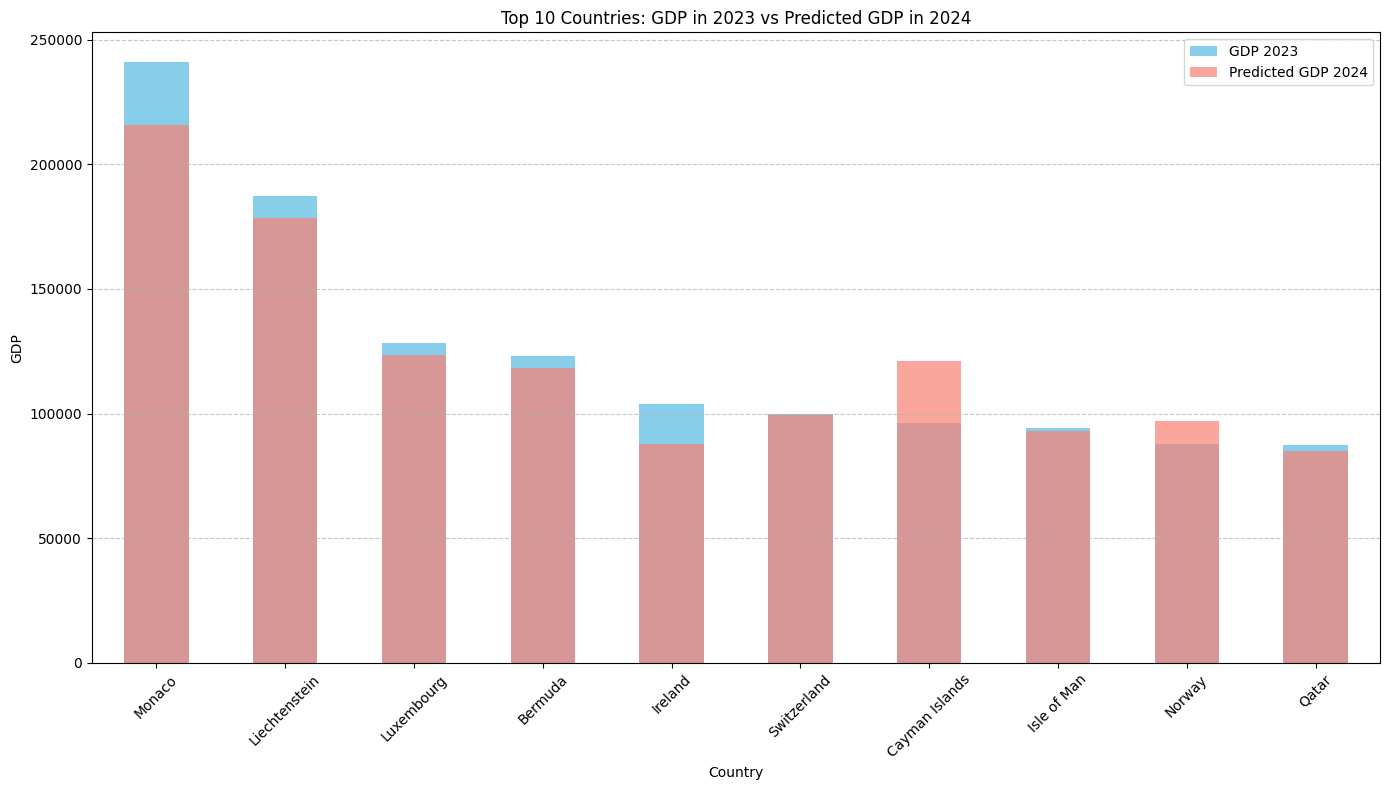

In [118]:
# Extract GDP values for 2023 and predicted GDP values for 2024
gdp_2023 = df_latest['2023']
predicted_gdp_2024 = df_latest['Predicted_GDP_2024']  # Assuming this column contains predicted GDP values for 2024

# Find the top 10 countries with the highest GDP in 2023
top_10_2023 = gdp_2023.nlargest(10)

# Find the top 10 countries with the highest predicted GDP in 2024
top_10_predicted_2024 = predicted_gdp_2024.nlargest(10)

# Create a combined DataFrame for comparison
comparison_df = pd.DataFrame({
    'Country': top_10_2023.index,
    'GDP 2023': top_10_2023.values,
    'Predicted GDP 2024': top_10_predicted_2024.reindex(top_10_2023.index, fill_value=0).values
})

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Plot for GDP in 2023
comparison_df.plot(kind='bar', x='Country', y='GDP 2023', ax=ax, color='skyblue', label='GDP 2023')

# Plot for predicted GDP in 2024
comparison_df.plot(kind='bar', x='Country', y='Predicted GDP 2024', ax=ax, color='salmon', label='Predicted GDP 2024', alpha=0.7)

plt.title('Top 10 Countries: GDP in 2023 vs Predicted GDP in 2024')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()